In [1]:
%matplotlib inline
from msgspec.json import decode
import seaborn as sbn
import numpy as np
from msgspec import Struct
from typing import Dict

# This program is designed to create a heat map of S1 given a Json file of the form template.json.

# Uses classes to build a path for reading the Json file:

class Nval(Struct):
    trialData: list # Assigns to nval an attrinute trialData of type list.
            
class Info(Struct):
    n: Dict[str, Nval] # Assigns to Info an attribute n of type Dict from str to Nval.

class Interaction(Struct):
    info: Info # Assigns to Interaction an attribute info of type Info.

In [16]:
# Gets the data from the Json file:
def get_data(file): # The json file this accepts must be of the type where s is fixed.
    with open(file, 'rb') as f:
         return decode(f.read(), type=Interaction)

# Creates the heat map:

def create_heat_map(nval, t, file): # The json file this accepts must be of the type where s is fixed.
    # Gets the t'th trial corresponding to a given number nval of points:
    trial = data.info.n[str(nval)].trialData[t]
    # Conversts the t'th trial into an array:
    matrix = np.array([[val] for val in trial]) 
    # The transpose ensures that we go vertically when we fix x, as in the json file.
    ax = sbn.heatmap(np.transpose(matrix), cmap = 'coolwarm', yticklabels=False)
    # Inverting the y-axis makes ensures the it increases up, not down.
    ax.invert_yaxis()

In [17]:
file = "test1.json"

# get_data should be executed in a separate cell from create_heatmap, especially if one is calling create_heat_map
# multiple times, since the resulting object creates a dictionary and it is best to only create the dictionary
# once and call from it afterwards, than to create it anew each time create_heat_map is called.

data = get_data(file)

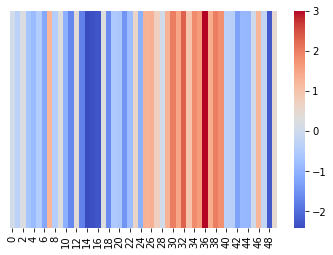

In [18]:
create_heat_map(50, 0, file)

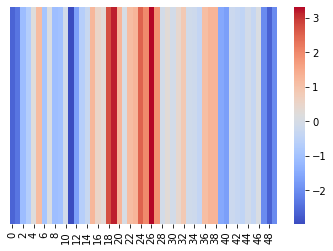

In [38]:
create_heat_map(50, 5, 'test1.json')

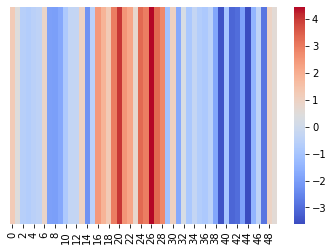

In [39]:
create_heat_map(50, 10, 'test1.json')

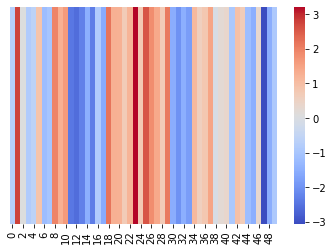

In [40]:
create_heat_map(50, 15, 'test1.json')

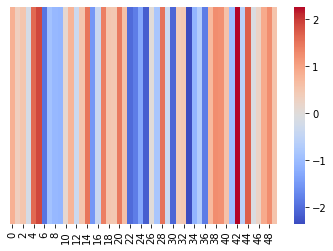

In [41]:
create_heat_map(50, 19, 'test1.json')